# Plots for Relativity Summary

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("MATPLOTLIB_RCPARAMS.sty")


from cycler import cycler
default_colors = ['tab:orange', 'tab:blue', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
color_cycle = cycler('color', default_colors)

plt.rc('axes', prop_cycle=color_cycle)


# mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# mpl_colors = [mpl_colors[1]] + [mpl_colors[0]] + mpl_colors[2:]
# mpl_colors

# color_cycle = cycler('color', mpl_colors)

# plt.rc('axes', prop_cycle=color_cycle)

## $\gamma$-factor

In [3]:
def gamma(v):
    return 1 / np.sqrt(1 - v**2)

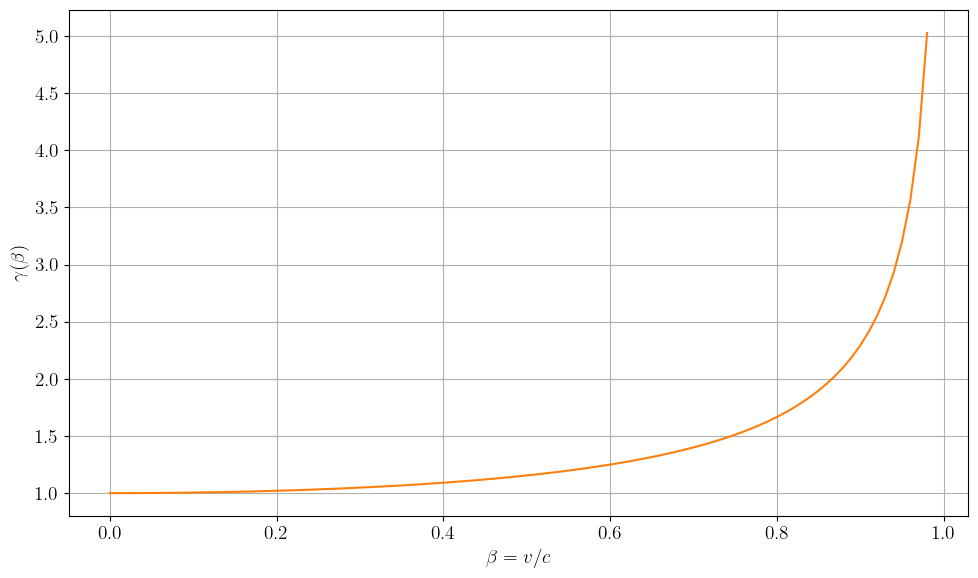

In [4]:
v_vals = np.arange(0.0, 0.99, step=0.01)
gamma_vals = gamma(v_vals)


plt.figure(figsize=(10, 6))  # Adjust for this plot
plt.plot(v_vals, gamma_vals)

plt.grid()
plt.xlabel(r'$\beta = v / c$')
plt.ylabel(r'$\gamma(\beta)$')

plt.tight_layout()
# plt.savefig('../pictures/gamma_factor.pdf')
plt.show()